# Employee Attrition Analysis & Prediction

## Importing Libraries

In [77]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Importing Dataset

In [78]:
# Loading the dataset to df variable
df = pd.read_csv('data/ibm_employee_dataset.csv')
print("Dataset import successful!")

Dataset import successful!


## Data Info

In [79]:
# View dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
print("Shape:", df.shape)

Shape: (1470, 35)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [82]:
# Summary Statistics
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Data Cleaning & Transformation

In [83]:
# Check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [84]:
# Drop irrelevant columns
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])
"Irrelevant Columns Dropped"

'Irrelevant Columns Dropped'

In [85]:
# Convert Attrition Column to Binary for Analysis
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [86]:
# Label Encode categorical Columns
## Select all the columns that are categorical dtypes
categorical_cols = df.select_dtypes(include='object').columns

# instance of labelencoder
le = LabelEncoder()

# Create separate df for visualization
df_viz = df.copy()

label_mapping = {}

# transforming each of the data in the categorical columns into binary
# for main df (to be used in modeling)
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# for df_viz for plotting
for col in categorical_cols:
    df_viz[col] = le.fit_transform(df_viz[col])
    label_mapping[col] = dict(zip(le.transform(le.classes_), le.classes_))
    df_viz[col + '_Label'] = df_viz[col].map(label_mapping[col])

# view the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [87]:
df_viz.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Label,Department_Label,EducationField_Label,Gender_Label,JobRole_Label,MaritalStatus_Label,OverTime_Label
0,41,1,2,1102,2,1,2,1,1,2,...,4,0,5,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,0,1,279,1,8,1,1,2,3,...,7,1,7,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,1,2,1373,1,2,2,4,4,4,...,0,0,0,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,0,1,1392,1,3,4,1,5,4,...,7,3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,0,2,591,1,2,1,3,7,1,...,2,2,2,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## Exploratory Data Analysis (EDA)

### Attrition Count

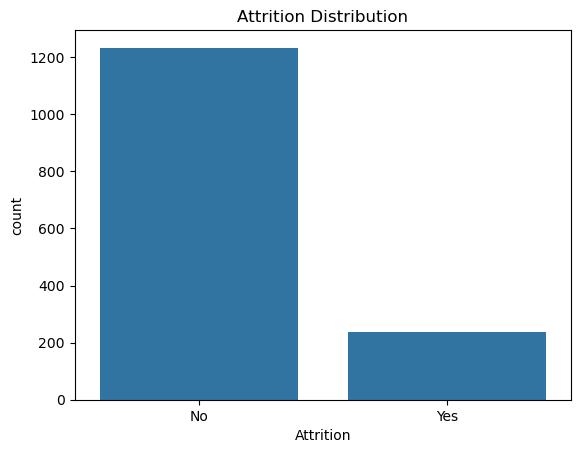

In [88]:
# Attrition Count
sns.countplot(x='Attrition', data=df_viz)
plt.title('Attrition Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Attrition by Department

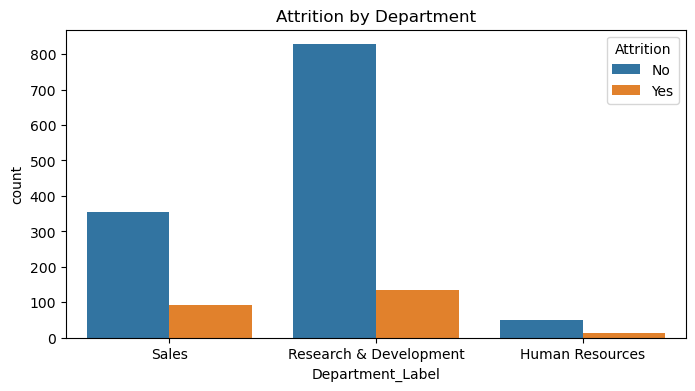

In [89]:
# Attrition by Department
plt.figure(figsize=(8, 4))
sns.countplot(x='Department_Label', hue='Attrition', data=df_viz)
plt.title("Attrition by Department")
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

### Attrition by Job Role

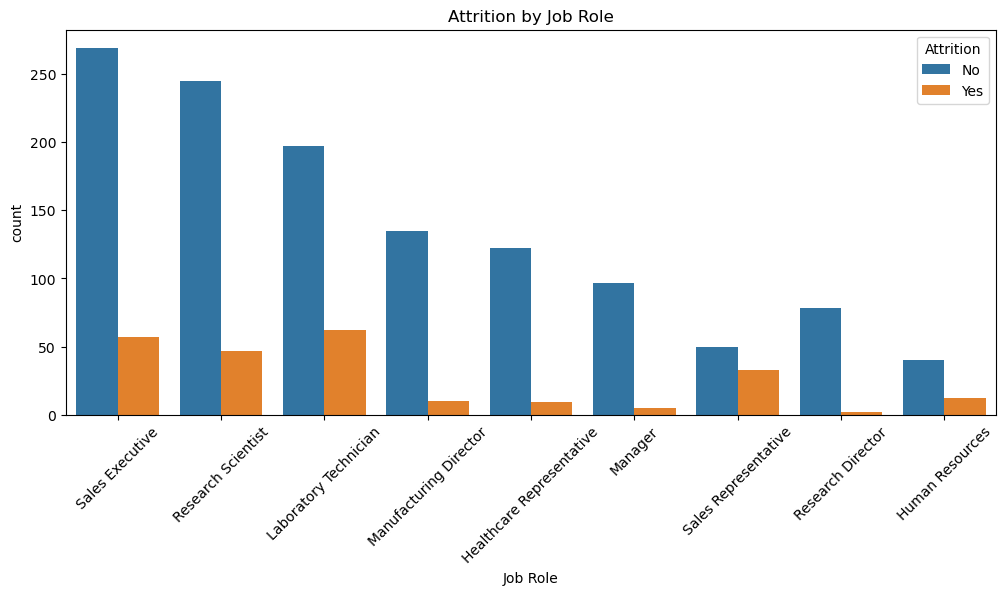

In [90]:
# Attrition by Job Role
plt.figure(figsize=(12, 5))
sns.countplot(x='JobRole_Label', hue='Attrition', data=df_viz)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

### Attrition vs. Overtime

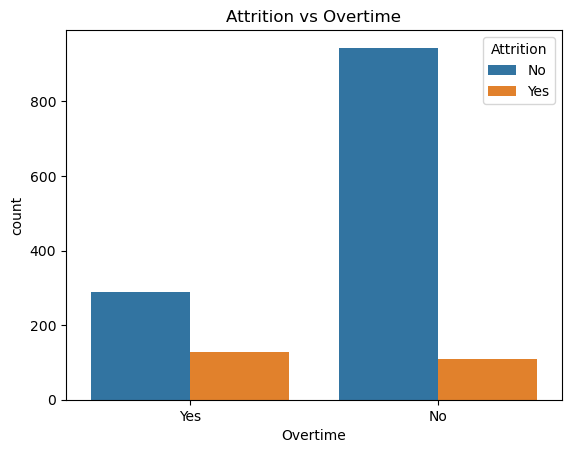

In [91]:
# Attrition vs Overtime
sns.countplot(x='OverTime_Label', hue='Attrition', data=df_viz)
plt.title('Attrition vs Overtime')
plt.xlabel("Overtime")
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

### Correlation Matrix

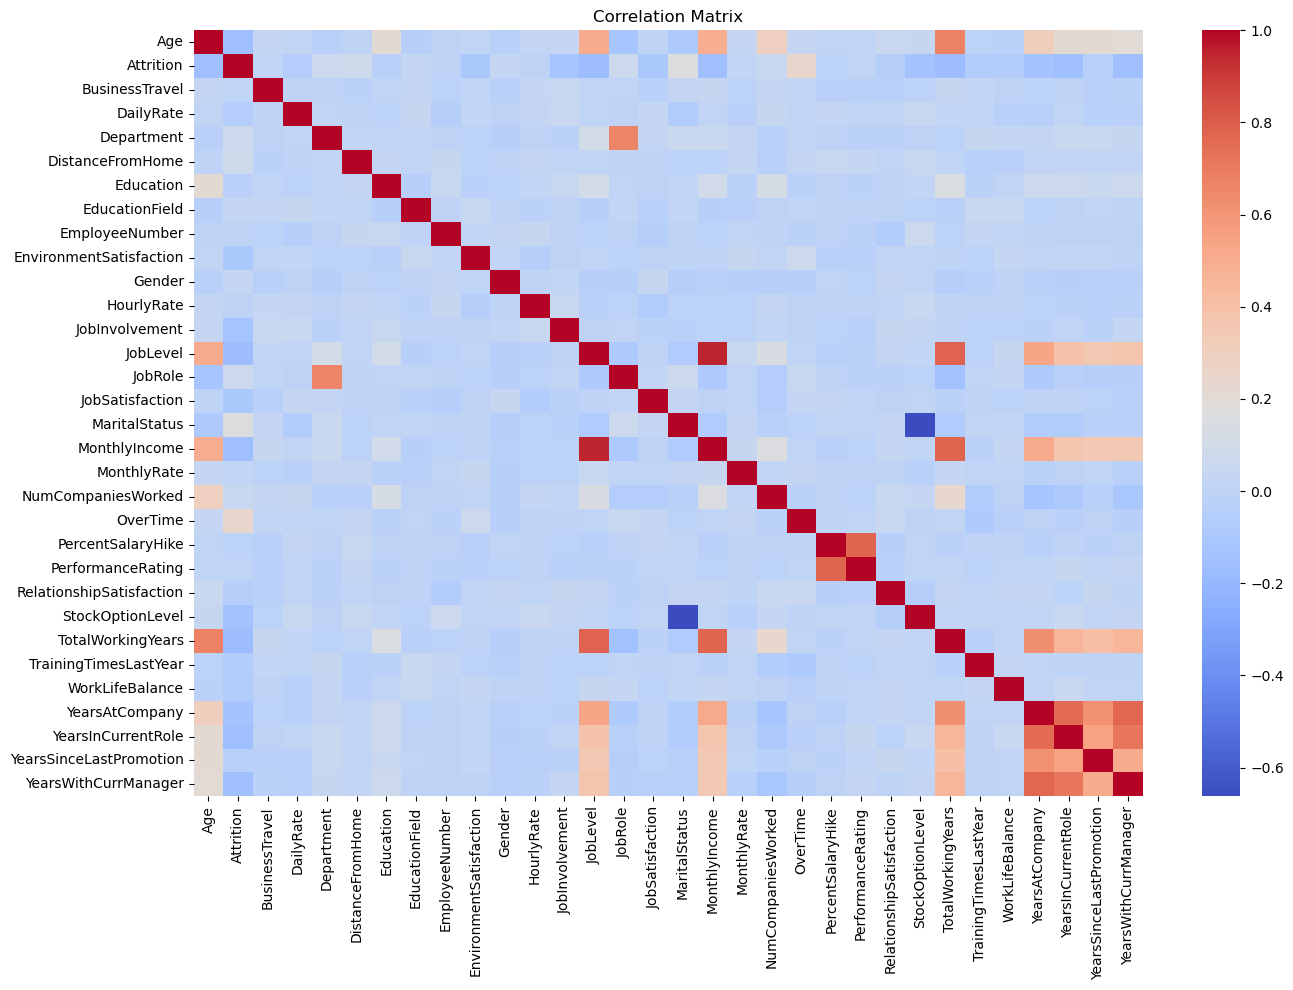

In [92]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Modeling
### Building Predictive Model (Logistic Regression)

#### Define x and y

In [93]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

#### Train/Test Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [95]:
# Instance of the Log Reg.
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fitting the model
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

#### Predictions

In [96]:
# y_pred_log = log_model.predict(X_test)

In [97]:
# Using threshold for better results
y_probs = log_model.predict_proba(X_test)[:, 1] 

y_pred_thresh = (y_probs > 0.3).astype(int)

#### Evaluation

In [98]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

Logistic Regression Accuracy: 0.48299319727891155
              precision    recall  f1-score   support

           0       0.93      0.44      0.59       255
           1       0.18      0.79      0.29        39

    accuracy                           0.48       294
   macro avg       0.55      0.62      0.44       294
weighted avg       0.83      0.48      0.55       294



### Predictive Model (Decision Tree)

In [99]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(class_weight='balanced',max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [100]:
y_pred_tree = tree_model.predict(X_test)

In [101]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       255
           1       0.26      0.44      0.33        39

    accuracy                           0.76       294
   macro avg       0.58      0.62      0.59       294
weighted avg       0.82      0.76      0.79       294



### Feature Importance (Who's at Risk?)

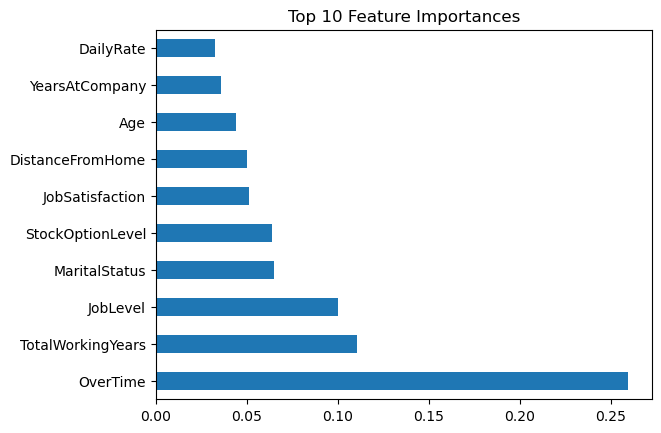

In [102]:
# Get top features from the tree model
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

# Plotting top 10
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

### "At-Risk" Table

In [103]:
# Add predictions back to test set
test_results = X_test.copy()
test_results['Attrition_Predicted'] = y_pred_thresh
test_results['Attrition_Prob'] = log_model.predict_proba(X_test)[:, 1]

# Filtering high-risk employees
at_risk = test_results[test_results['Attrition_Prob'] > 0.5].sort_values(by='Attrition_Prob', ascending=False)
at_risk.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Predicted,Attrition_Prob
237,52,0,771,2,2,4,1,329,1,1,...,0,33,2,4,33,7,15,12,1,0.959841
1114,48,2,1108,1,15,4,4,1576,3,0,...,1,10,3,2,8,2,7,6,1,0.949058
892,19,0,504,1,10,3,3,1248,1,0,...,0,1,2,4,1,1,0,0,1,0.916512
1057,29,1,115,2,13,3,5,1487,1,0,...,0,7,4,1,5,3,0,0,1,0.892307
1406,54,2,157,1,10,3,3,1980,3,0,...,0,9,3,3,5,2,1,4,1,0.886125
591,33,2,118,2,16,3,2,819,1,0,...,0,6,3,3,3,2,0,2,1,0.879835
841,24,2,477,1,24,3,3,1173,4,1,...,0,6,2,3,4,3,1,2,1,0.868604
277,38,2,322,2,7,2,3,382,1,0,...,1,8,3,3,8,0,7,7,1,0.860581
218,45,0,1052,2,6,3,3,302,4,0,...,0,23,2,3,19,7,12,8,1,0.850051
864,41,0,906,1,5,2,1,1210,1,1,...,1,5,2,1,1,0,0,0,1,0.848711


#### Exporting The data for Dashboard creation
##### Decoding Categorical Columns

In [107]:
# Creating copy of the at_risk
at_risk_decoded = at_risk.copy()

# Loop through all the encoded columns to decode them
for col in label_mapping:
    if col in at_risk_decoded.columns:
        at_risk_decoded[col] = at_risk_decoded[col].map(label_mapping[col])

# Reset Index
at_risk_decoded.reset_index(drop=True, inplace=True)

# View data
at_risk_decoded.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Predicted,Attrition_Prob
0,52,Non-Travel,771,Sales,2,4,Life Sciences,329,1,Male,...,0,33,2,4,33,7,15,12,1,0.959841
1,48,Travel_Rarely,1108,Research & Development,15,4,Other,1576,3,Female,...,1,10,3,2,8,2,7,6,1,0.949058
2,19,Non-Travel,504,Research & Development,10,3,Medical,1248,1,Female,...,0,1,2,4,1,1,0,0,1,0.916512
3,29,Travel_Frequently,115,Sales,13,3,Technical Degree,1487,1,Female,...,0,7,4,1,5,3,0,0,1,0.892307
4,54,Travel_Rarely,157,Research & Development,10,3,Medical,1980,3,Female,...,0,9,3,3,5,2,1,4,1,0.886125


##### Exporting

In [108]:
at_risk_decoded.to_csv('data/at_risk_employees.csv', index=False)